Files already downloaded and verified
<class 'torchvision.datasets.cifar.CIFAR10'>
50000
<class 'tuple'>
2
image: torch.Size([3, 224, 224])
label: 6
<class 'torchvision.datasets.cifar.CIFAR10'>
10000
<class 'tuple'>
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** cat **


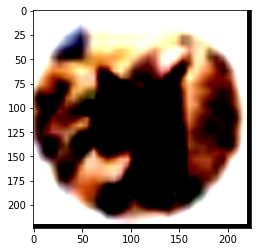

data.shape : torch.Size([128, 3, 224, 224])
target.shape : torch.Size([128])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 224, 224])


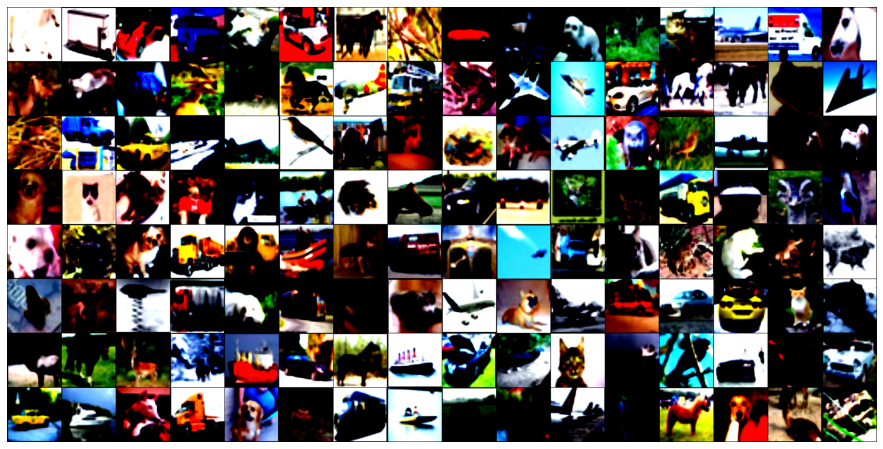

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import os
import torch.backends.cudnn as cudnn

dic = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog',
       6:'frog', 7:'horse', 8:'ship', 9:'truck'}

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

transform_train = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.RandomCrop(224, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])


train_dataset = datasets.CIFAR10(root='/home/ljj0512/private/dataset/cifar-10',
                                 train=True,
                                 transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR10(root='/home/ljj0512/private/dataset/cifar-10',
                                train=False,
                                transform=transform_test)

print(type(train_dataset))                                
print(len(train_dataset))
print(type(train_dataset[0]))                                
print(len(train_dataset[0]))
print('image:',train_dataset[0][0].shape)
print('label:',train_dataset[0][1])
print("="*50)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)

import matplotlib.pyplot as plt
from torchvision.utils import make_grid

for idx, (data, target) in enumerate(train_loader):
   if idx == 1:
      break
   print('**',dic[target[0].item()],'**')
   plt.imshow(data[0].permute(1,2,0))
   plt.show()
   print('data.shape :',data.shape) # batch_size, C, H, W
   print('target.shape :',target.shape)
   print()


for images, _ in train_loader:
   print('images.shape:', images.shape)
   plt.figure(figsize=(16,8))
   plt.axis('off')
   plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
   break
plt.show()

Files already downloaded and verified
<class 'torchvision.datasets.cifar.CIFAR10'>
50000
<class 'tuple'>
2
<class 'PIL.Image.Image'>
50000
<class 'torch.Tensor'>
10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** ship **
torch.Size([3, 224, 224])


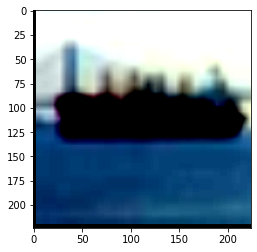

data.shape : torch.Size([128, 3, 224, 224])
target.shape : torch.Size([128])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 224, 224])


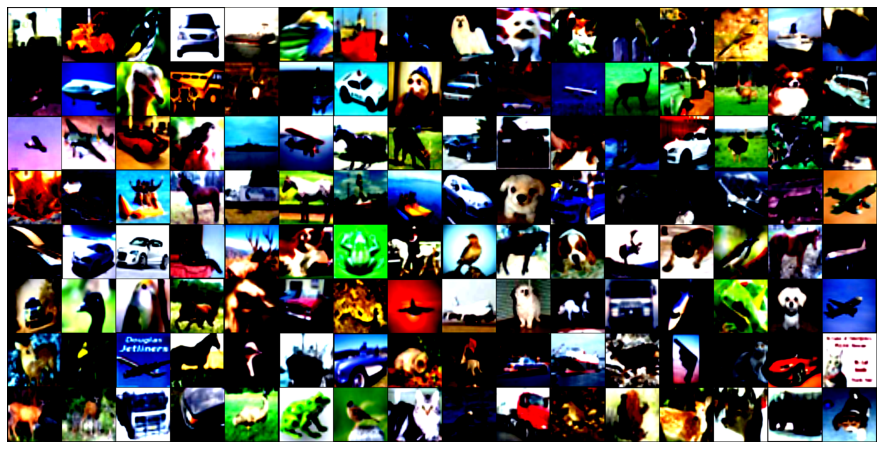

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import os
import torch.backends.cudnn as cudnn

dic = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog',
       6:'frog', 7:'horse', 8:'ship', 9:'truck'}

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

# transform_train = transforms.Compose([
#     transforms.Resize([224, 224]),
#     transforms.RandomCrop(224, padding = 4),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
#                           std=(0.2471, 0.2436, 0.2616))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
#                           std=(0.2471, 0.2436, 0.2616))
# ])


train_dataset = datasets.CIFAR10(root='/home/ljj0512/private/dataset/cifar-10',
                                 train=True,
                                 # transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR10(root='/home/ljj0512/private/dataset/cifar-10',
                                train=False,
                              #   transform=transform_test
                                )

print(type(train_dataset))                                
print(len(train_dataset))
print(type(train_dataset[0]))                                
print(len(train_dataset[0]))
print(type(train_dataset[0][0]))
# print('image:',train_dataset[0][0].shape)
# print('label:',train_dataset[0][1])
print("="*50)

train_dataset.transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.RandomCrop(224, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

test_dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

print(len(train_dataset))
print(type(train_dataset[0][0]))
print(len(test_dataset))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

import matplotlib.pyplot as plt
from torchvision.utils import make_grid

for idx, (data, target) in enumerate(train_loader):
   if idx == 1:
      break
   print('**',dic[target[0].item()],'**')
   print(data[0].shape)
   plt.imshow(data[0].permute(1,2,0))
   plt.show()
   print('data.shape :',data.shape) # batch_size, C, H, W
   print('target.shape :',target.shape)
   print()

for images, _ in train_loader:
   print('images.shape:', images.shape)
   plt.figure(figsize=(16,8))
   plt.axis('off')
   plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
   break
plt.show()